In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt, ticker
from plotutils import plot_parallel

In [24]:
# df = pd.read_csv('results_B.csv', index_col=0)

# df = pd.read_csv('results_A.csv', index_col=0)
# param_cols = ['conv_hidden_channels', 'conv_num_layers', 'encoder_hidden_channels', 'encoder_num_layers']

df = pd.read_csv('results_C.csv', index_col=0)
param_cols = ['dropout_rate', 'encoder_hidden_channels', 'optimizer__weight_decay', 'valid_err']

for i, v in enumerate(param_cols):
	if v in ['dropout_rate', 'optimizer__weight_decay', 'valid_err']:
		df['log_'+v] = np.log10(df[v]+1e-16)
		param_cols[i] = 'log_'+v

In [26]:
df\
	.groupby(list(df.drop(columns=['valid_loss', 'valid_err', 'log_valid_err']).columns))\
	[['valid_loss', 'valid_err']]\
	.agg(['mean', 'std'])\
	.reset_index()\
	.nsmallest(20, ('valid_loss', 'mean'))
	# .nsmallest(20, ('valid_err', 'mean'))

dropout_rate encoder_hidden_channels optimizer__weight_decay  \
                                                                   
11  1.000000e-07                      80                 0.00100   
14  1.000000e-07                     110                 0.00100   
18  1.000000e-05                      80                 0.00000   
19  1.000000e-05                      80                 0.00001   
0   0.000000e+00                      80                 0.00000   
15  1.000000e-07                     140                 0.00000   
13  1.000000e-07                     110                 0.00001   
3   0.000000e+00                     110                 0.00000   
7   0.000000e+00                     140                 0.00001   
2   0.000000e+00                      80                 0.00100   
1   0.000000e+00                      80                 0.00001   
9   1.000000e-07                      80                 0.00000   
25  1.000000e-05                     140                 0.00001   
10  1.000000e-07                      80                 0.00001   
16  1.000000e-07                     140                 0.00001   
22  1.000000e-05                     110                 0.00001   
17  1.000000e-07                     140                 0.00100   
23  1.000000e-05                     110                 0.00100   
24  1.000000e-05                     140                 0.00000   
5   0.000000e+00                     110                 0.00100   

   log_dropout_rate log_optimizer__weight_decay valid_loss            \
                                                      mean       std   
11             -7.0                        -3.0   0.068413  0.044602   
14             -7.0                        -3.0   0.078671  0.029639   
18             -5.0                       -16.0   0.090088  0.034541   
19             -5.0                        -5.0   0.095751  0.050926   
0             -16.0                       -16.0   0.099274  0.082415   
15             -7.0                       -16.0   0.099310  0.056913   
13             -7.0                        -5.0   0.110407  0.037758   
3             -16.0                       -16.0   0.110928  0.056750   
7             -16.0                        -5.0   0.111891  0.091781   
2             -16.0                        -3.0   0.113151  0.055193   
1             -16.0                        -5.0   0.116106  0.064357   
9              -7.0                       -16.0   0.116325  0.033331   
25             -5.0                        -5.0   0.118109  0.024246   
10             -7.0                        -5.0   0.119949  0.045980   
16             -7.0                        -5.0   0.122854  0.058914   
22             -5.0                        -5.0   0.125653  0.092427   
17             -7.0                        -3.0   0.131720  0.074187   
23             -5.0                        -3.0   0.144847  0.089929   
24             -5.0                       -16.0   0.150349  0.077783   
5             -16.0                        -3.0   0.166851  0.080458   

   valid_err            
        mean       std  
11  0.022239  0.011384  
14  0.047565  0.034171  
18  0.168641  0.259554  
19  0.297128  0.477719  
0   0.314131  0.526250  
15  0.013427  0.008583  
13  0.350514  0.294385  
3   0.063561  0.088673  
7   0.171240  0.256671  
2   0.074595  0.093761  
1   0.108896  0.170752  
9   0.016449  0.017503  
25  0.011748  0.008771  
10  0.028964  0.022753  
16  0.145808  0.042566  
22  0.113853  0.093215  
17  0.012449  0.003320  
23  0.175912  0.075174  
24  0.154471  0.183466  
5   0.089703  0.076447

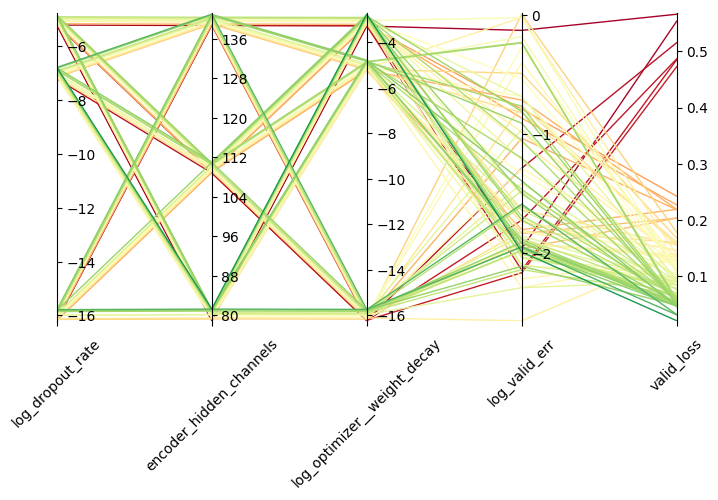

In [28]:
axs = plot_parallel(df[param_cols+['valid_loss']], shift=0.02, alpha=1)
for ax in axs[:-1]:
	ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45);

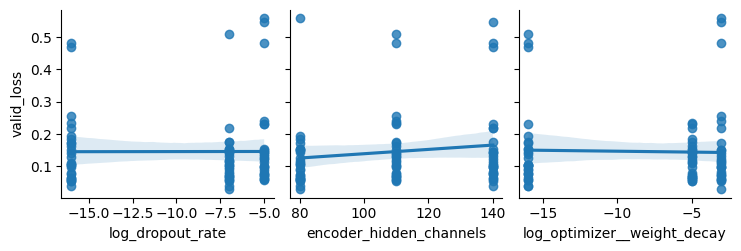

In [5]:
sns.pairplot(df, y_vars=['valid_loss'], x_vars=param_cols, kind="reg")